In [23]:
import time
import matplotlib.pyplot as plt
import numpy as np


class Analysis:
    def __init__(self, action_map):
        self.game = None
        self.actions = []
        self.action_map = action_map

    def set_game(self, game_number):
        self.game = game_number

    def record_action(self, action_name, id):
        if id not in range(1, 5):
            print('Error: ID must be between 1 and 4.')
            return

        if action_name not in self.action_map:
            print(f'Error: {action_name} is not a valid action.')
            return

        timestamp = time.time()
        action_id = self.action_map[action_name]
        self.actions.append((action_id, id, timestamp))

    def generate_plot(self):
        actions_count = {}
        for action_id, id, timestamp in self.actions:
            if id in actions_count:
                actions_count[id] += 1
            else:
                actions_count[id] = 1

        x = list(actions_count.keys())
        y = [actions_count[i] for i in x]
        
    
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        colors = plt.cm.cool(np.linspace(0, 1, len(x)))
        axs[0, 0].set_title('Player 1')
        axs[0, 0].bar(x,y)
        axs[0, 1].set_title('Player 2')
        axs[0, 1].bar(x,y)
        axs[1, 1].bar(x, y)
        axs[1, 0].bar(x, y)
        axs[1, 0].set_title('Player 3')
        axs[1, 1].set_title('Player 4')
        
        fig.text(0.5, 0.04, 'Action Type', ha='center')
        fig.text(0.04, 0.5, 'Action Count', va='center', rotation='vertical')
        
        plt.show()


                

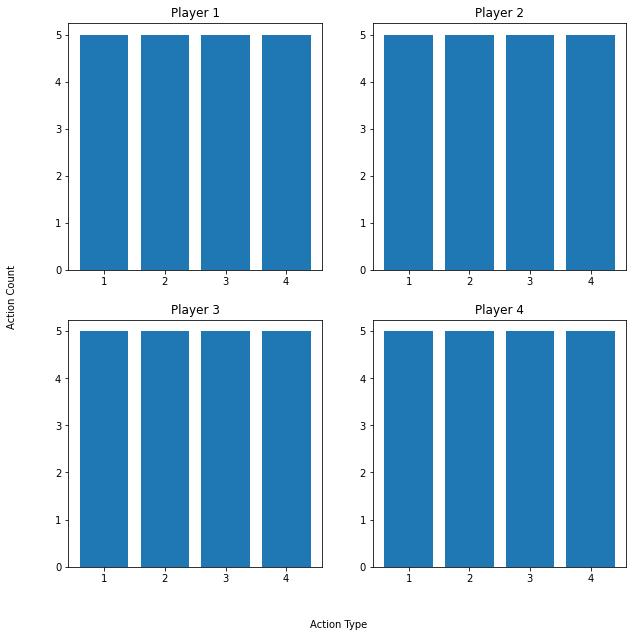

In [24]:
action_map = {'BUILD_ROAD': 1, 'BUILD_CITY': 2, 'BUILD_SETTLEMENT': 3, 'DISCARD': 4, 'ROLL': 5, 'MOVE_ROBBER': 6,
             'PLAY_KNIGHT_CARD': 7, 'PLAY_YEAR_OF_PLENTY': 8, 'PLAY_MONOPOLY': 9, 'PLAY_ROAD_BUILDING': 10,
             'MARITIME_TRADE': 11, 'CONFIRM_TRADE': 12, 'END_TURN': 13} 
action_color_map = {'BUILD_ROAD':'yellow','BUILD_CITY': 'blue','BUILD_SETTLEMENT': 'green','DISCARD': 'black','ROLL': 'orange',
                    'MOVE_ROBBER': 'purple', 'PLAY_KNIGHT_CARD': 'pink','PLAY_YEAR_OF_PLENTY': 'brown','PLAY_MONOPOLY': 'gray',
                    'PLAY_ROAD_BUILDING': 'teal','MARITIME_TRADE': 'magenta','CONFIRM_TRADE': 'cyan', 'END_TURN': 'red'
}
analysis = Analysis(action_map)


# Set the game number and record some actions
analysis.set_game(1)
analysis.record_action('BUILD_ROAD', 1)
analysis.record_action('PLAY_KNIGHT_CARD', 2)
analysis.record_action('BUILD_CITY', 3)
analysis.record_action('DISCARD', 4)
analysis.record_action('ROLL', 1)
analysis.record_action('MOVE_ROBBER', 2)
analysis.record_action('PLAY_YEAR_OF_PLENTY', 3)
analysis.record_action('PLAY_MONOPOLY', 4)
analysis.record_action('PLAY_ROAD_BUILDING', 1)
analysis.record_action('MARITIME_TRADE', 2)
analysis.record_action('CONFIRM_TRADE', 3)
analysis.record_action('END_TURN', 4)
analysis.record_action('BUILD_CITY', 1)
analysis.record_action('PLAY_KNIGHT_CARD', 2)
analysis.record_action('DISCARD', 3)
analysis.record_action('ROLL', 4)
analysis.record_action('PLAY_YEAR_OF_PLENTY', 1)
analysis.record_action('PLAY_MONOPOLY', 2)
analysis.record_action('PLAY_ROAD_BUILDING', 3)
analysis.record_action('END_TURN', 4)
analysis.generate_plot()
#Needs to be edited to incorporate actions per player and the colors line acounts for the amount of actions

In [ ]:
 ROLL = "ROLL"  # value is None. Log instead sets it to (int, int) rolled.
    MOVE_ROBBER = "MOVE_ROBBER"  # value is (coordinate, Color|None). Log has extra element of card stolen.
    DISCARD = "DISCARD"  # value is None|Resource[]. TODO: Should always be Resource[].

    # Building/Buying
    BUILD_ROAD = "BUILD_ROAD"  # value is edge_id
    BUILD_SETTLEMENT = "BUILD_SETTLEMENT"  # value is node_id
    BUILD_CITY = "BUILD_CITY"  # value is node_id
    BUY_DEVELOPMENT_CARD = "BUY_DEVELOPMENT_CARD"  # value is None. Log value is card

    # Dev Card Plays
    PLAY_KNIGHT_CARD = "PLAY_KNIGHT_CARD"  # value is None
    PLAY_YEAR_OF_PLENTY = "PLAY_YEAR_OF_PLENTY"  # value is (Resource, Resource)
    PLAY_MONOPOLY = "PLAY_MONOPOLY"  # value is Resource
    PLAY_ROAD_BUILDING = "PLAY_ROAD_BUILDING"  # value is None

    # ===== Trade
    # MARITIME_TRADE value is 5-resouce tuple, where last resource is resource asked.
    #   resources in index 2 and 3 might be None, denoting a port-trade.
    MARITIME_TRADE = "MARITIME_TRADE"
    # Domestic Trade (player to player trade)
    # Values for all three is a 10-resource tuple, first 5 is offered freqdeck, last 5 is
    #   receiving freqdeck.
    OFFER_TRADE = "OFFER_TRADE"
    ACCEPT_TRADE = "ACCEPT_TRADE"
    REJECT_TRADE = "REJECT_TRADE"
    # CONFIRM_TRADE value is 11-tuple. first 10 as in OFFER_TRADE, last is color of accepting player
    CONFIRM_TRADE = "CONFIRM_TRADE"
    CANCEL_TRADE = "CANCEL_TRADE"  # value is None

    END_TURN = "END_TURN"  # value is None

In [ ]:
test_data = [    ["Action 1", "ID 1"],
    ["Action 2", "ID 2"],
    ["Action 3", "ID 3"],
    ["Action 4", "ID 4"],
    ["Action 5", "ID 1"],
    ["Action 6", "ID 2"],
    ["Action 7", "ID 3"],
    ["Action 1", "ID 4"],
    ["Action 2", "ID 1"],
    ["Action 3", "ID 2"],
    ["Action 4", "ID 3"],
    ["Action 5", "ID 4"],
    ["Action 6", "ID 1"],
    ["Action 7", "ID 2"],
    ["Action 1", "ID 3"],
    ["Action 2", "ID 4"],
    ["Action 3", "ID 1"],
    ["Action 4", "ID 2"],
    ["Action 5", "ID 3"],
    ["Action 6", "ID 4"],
    ["Action 7", "ID 1"]